In [27]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import seaborn as sns

In [2]:
mpg_df = pd.read_csv("car-mpg.csv")  

In [3]:
# Check top few records to get a feel of the data structure
mpg_df.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
# drop the car name column as it is useless for the model
mpg_df = mpg_df.drop('car name', axis=1)

In [5]:
mpg_df.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
pd.unique(mpg_df.origin)

array([1, 3, 2], dtype=int64)

In [7]:
# Replace the numbers in categorical variables with the actual country names in the origin col
mpg_df['origin'] = mpg_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [8]:
mpg_df.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [9]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
# This is also kown as one hot coding. The column names will be America, Europe and Asia... with one hot coding
mpg_df = pd.get_dummies(mpg_df, columns=['origin'], drop_first=True)

In [10]:
mpg_df.head(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,0


In [11]:
#Lets analysze the distribution of the dependent (mpg) column
mpg_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
origin_europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0


In [12]:
mpg_df.dtypes

mpg              float64
cyl                int64
disp             float64
hp                object
wt                 int64
acc              float64
yr                 int64
origin_asia        uint8
origin_europe      uint8
dtype: object

In [13]:
# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
mpg_df = mpg_df.replace('?', np.nan)

In [14]:
#Let us see if we can get those records with nan
mpg_df[mpg_df.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,0,0


In [15]:
#mpg_df.dropna(inplace=True)

In [16]:
# There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. 

In [17]:
#of the 398 rows 6 have NAN in the hp column. We will drop those 6 rows. Not a good idea under all situations
#note: HP is missing becauses of the non-numeric values in the column. 
#mpg_df = mpg_df.dropna()

In [18]:
#instead of dropping the rows, lets replace the missing values with median value. 
mpg_df.median()

mpg                23.0
cyl                 4.0
disp              148.5
hp                 93.5
wt               2803.5
acc                15.5
yr                 76.0
origin_asia         0.0
origin_europe       0.0
dtype: float64

In [19]:
# replace the missing values in 'hp' with median value of 'hp' :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#mpg_df = mpg_df.fillna(mpg_df.median())

mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)


In [20]:
mpg_df.dtypes

mpg              float64
cyl                int64
disp             float64
hp                object
wt                 int64
acc              float64
yr                 int64
origin_asia        int64
origin_europe      int64
dtype: object

In [21]:
mpg_df['hp'] = mpg_df['hp'].astype('float64')  # converting the hp column from object / string type to float


In [22]:
mpg_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
origin_europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0


In [23]:
data = mpg_df[['hp', 'mpg']]
data['sqrHp'] = np.sqrt(data.hp)

C:\Users\rsdwi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
data.corr()

,hp,mpg,sqrHp
hp,1.000000,-0.773453,0.995125
mpg,-0.773453,1.000000,-0.796743
sqrHp,0.995125,-0.796743,1.000000


In [25]:
sns.pairplot(data)

NameError: name 'sns' is not defined

In [26]:
mpg_df.shape

(398, 9)

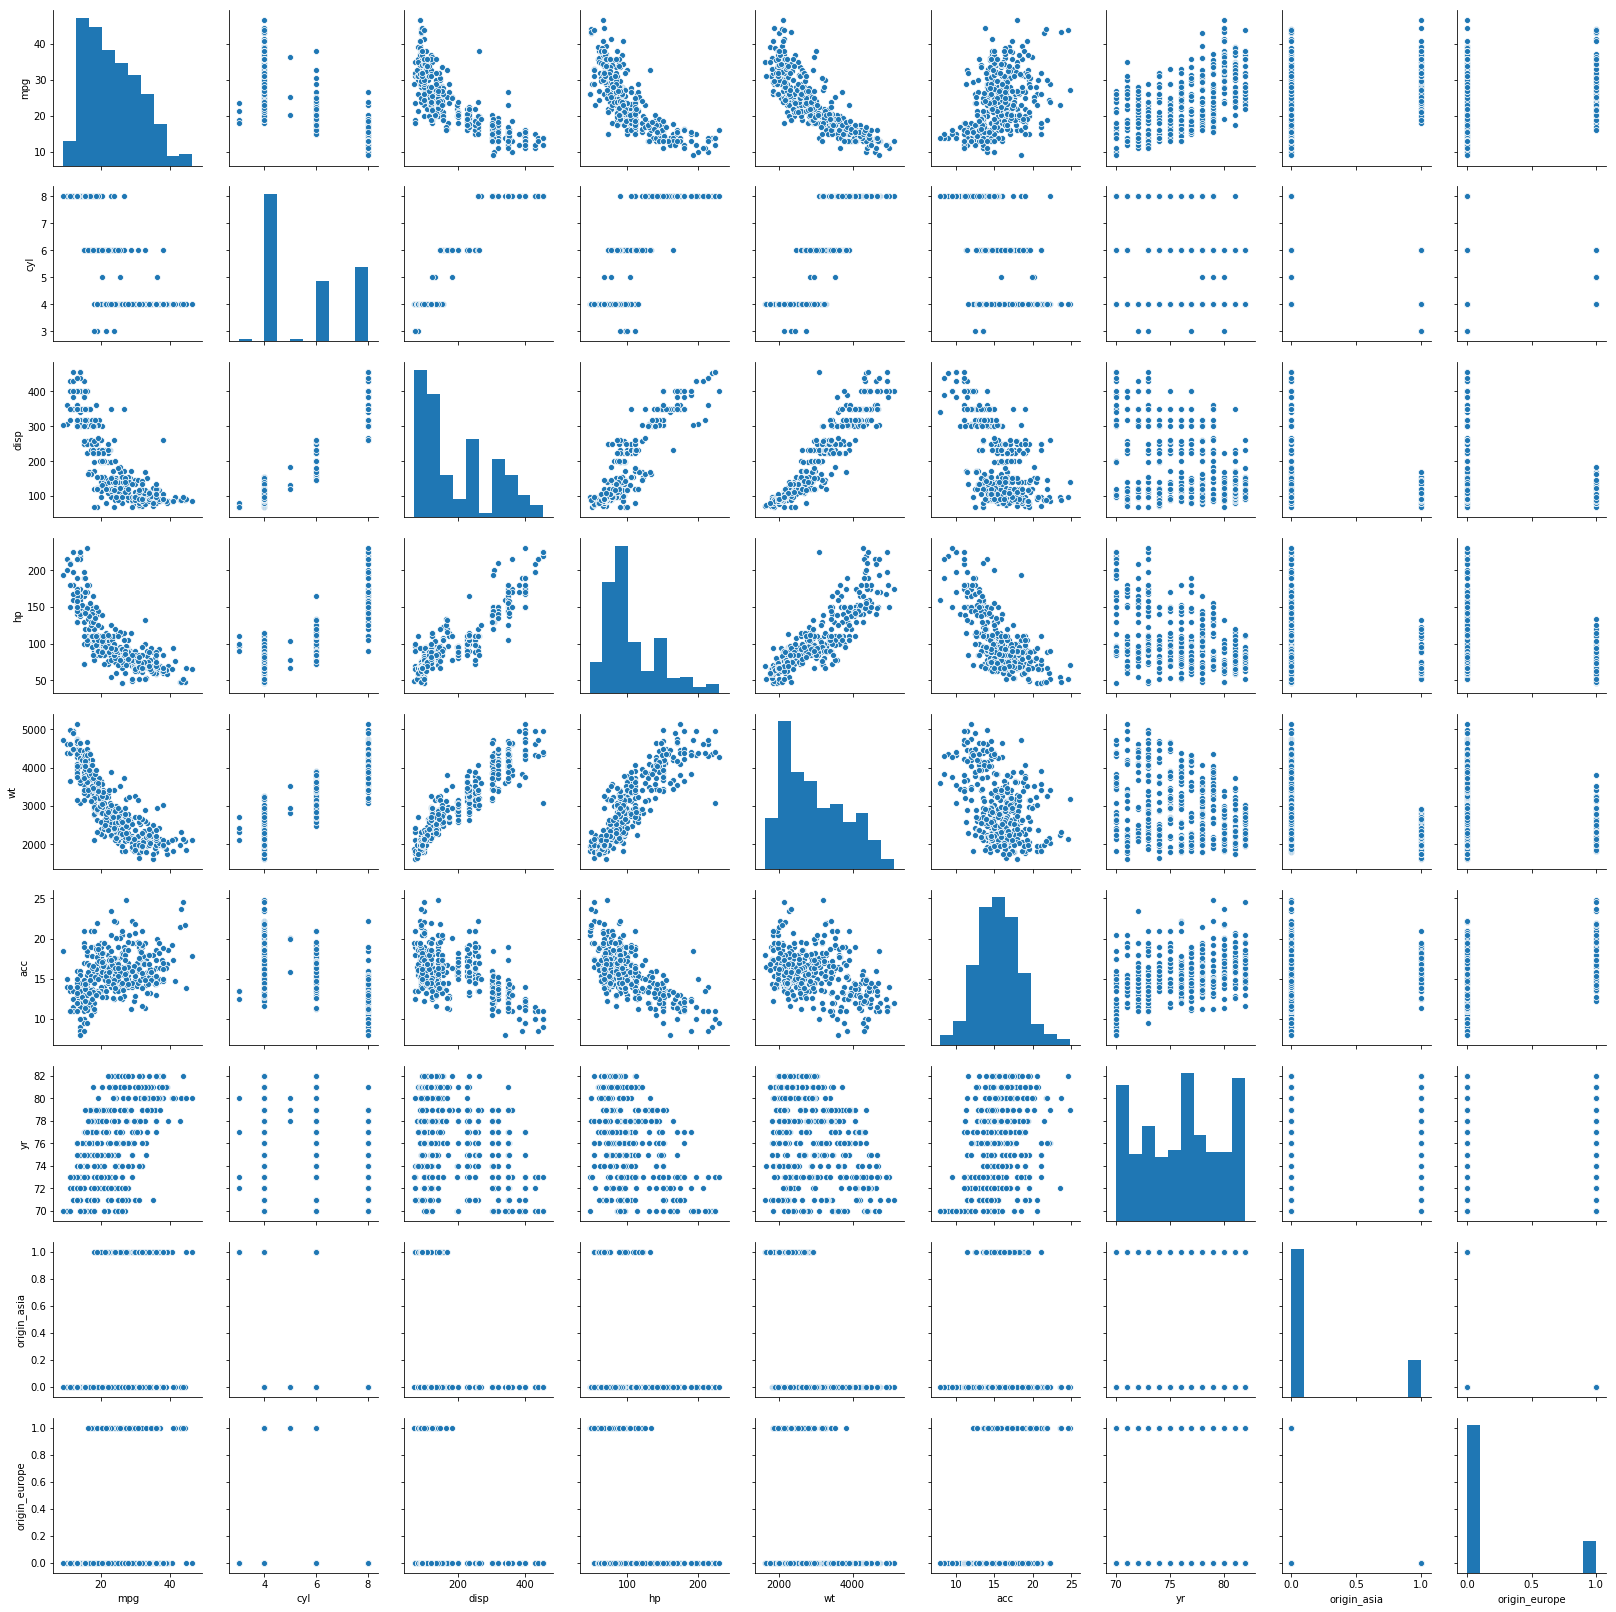

In [27]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions

sns.pairplot(mpg_df)   # to plot density curve instead of histogram

# The result can be stored as a .png file and opened in say, paint to get a larger view 
#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig('mpg_pairpanel.png')

The data distribution across various dimensions except 'Acc' do not look normal

Close observation between 'mpg' and other attributes indicate the relationship is not really linear
relation between 'mpg' and 'hp' .. which will impact model accuracy

How about 'mpg' vs 'yr' surprising to see a positive relation

In [28]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df.drop('mpg', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df[['mpg']]


In [29]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [30]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [31]:
X_train.head(2)

,cyl,disp,hp,wt,acc,yr,origin_asia,origin_europe
192,6,250.0,105.0,3353,14.5,76,0,0
27,8,318.0,210.0,4382,13.5,70,0,0


In [32]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -0.358793831811345
The coefficient for disp is 0.029786224589748278
The coefficient for hp is -0.017326691282575742
The coefficient for wt is -0.007553159740821478
The coefficient for acc is 0.11679979864255366
The coefficient for yr is 0.8450036895617287
The coefficient for origin_asia is 2.6413579818630315
The coefficient for origin_europe is 3.0676303822648143


In [34]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -23.016591718613782


In [35]:
regression_model.score(X_train, y_train)

0.8164028573708605

In [36]:
# we can write our linear model as:
# Y=−21.11–0.35×X1+0.03×X2–0.02×X3–0.01×X4+0.12×X5+0.85×X6–1.90×X7+0.74×X8+1.16×X9

In [37]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.8442319636519986

In [38]:
# So the model explains 84.4% of the variability in Y using X